## 울산광역시 중구 격자-행정동 매핑
격자파일과 행정동 파일을 매핑하여 해당 격자 id에 행정동 이름을 부여합니다.

In [50]:
from shapely.geometry import shape, GeometryCollection, Point, Polygon
import json
from  tqdm import tqdm
import pandas as pd

### 울산광역시 중구 격자 (300X300) 파일 로드

In [51]:
with open('grid_ulsan_joongu_100x100.geojson','r',encoding='utf-8-sig') as f:
    js = json.load(f)

In [52]:
len(js['features'])

3900

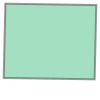

In [53]:
shape(js['features'][0]["geometry"])

### 울산광역시 중구 행정동 파일 로드

In [54]:
with open('울산_중구_행정동_경계.geojson','r',encoding='utf-8-sig') as f:
    dong = json.load(f)

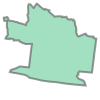

In [55]:
shape(dong['features'][0]["geometry"])

In [56]:
dong

{'type': 'FeatureCollection',
 'name': '울산_중구_행정동_경계',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'BASE_DATE': '20210630',
    'ADM_DR_CD': '2601051',
    'ADM_DR_NM': '학성동',
    'OBJECTID': '1103'},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[129.33298476780377, 35.56061996848557],
       [129.33329817838433, 35.5603477827557],
       [129.333335956519, 35.56033016597886],
       [129.33338531076188, 35.56030604270077],
       [129.3335392641768, 35.56023079206031],
       [129.33357063482165, 35.56030782435376],
       [129.33357779803293, 35.56032572934968],
       [129.33362811964162, 35.56031012314559],
       [129.3342613120013, 35.560113591603375],
       [129.33417119515101, 35.55992545665266],
       [129.33424834186917, 35.5598834952033],
       [129.3346199929461, 35.5595558969439],
       [129.3348073331849, 35.55939091048742],
       [129.3350040119894, 35.55921

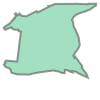

In [57]:
shape(dong['features'][1]["geometry"])

In [58]:
mapping = dict()
for ft in tqdm(dong['features']):
    polygon14 = shape(ft['geometry'])
    
    for idx, feature in enumerate(js['features']):
        polygon = shape(js['features'][idx]['geometry'])
        
        if polygon14.intersects(polygon):
            mapping[js['features'][idx]["properties"]["id"]] = ft['properties']["ADM_DR_NM"]

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:01<00:00,  7.83it/s]


In [59]:
mapping_grid_dong = pd.DataFrame(mapping.keys(),mapping.values())
mapping_grid_dong.reset_index(inplace=True)
mapping_grid_dong.rename(columns = {0 : 'id', 'index' : '행정동'}, inplace=True)
mapping_grid_dong = mapping_grid_dong[['id', '행정동']]

In [60]:
mapping_grid_dong.head()

,id,행정동
0,5014,반구1동
1,5012,반구1동
2,5013,반구1동
3,5010,반구1동
4,5011,반구1동


In [61]:
mapping_grid_dong.tail()

,id,행정동
3894,3464,중앙동
3895,3402,중앙동
3896,3340,중앙동
3897,3339,중앙동
3898,3277,중앙동


In [62]:
set(mapping_grid_dong['행정동'])

{'다운동',
 '반구1동',
 '반구2동',
 '병영1동',
 '병영2동',
 '복산1동',
 '복산2동',
 '성안동',
 '약사동',
 '우정동',
 '중앙동',
 '태화동',
 '학성동'}

## 행정동 - 격자 데이터 매핑

In [63]:
data = pd.read_csv('울산_중구_격자데이터_종합_100x100.csv',index_col = 0)
data = data[['id','coordinates','단속건수_2018','단속건수_2019','단속건수_2020','단속건수_2022','공시지가 평균']]

In [64]:
data_mapping = pd.merge(data,mapping_grid_dong,on = 'id',how = 'left')
data_mapping

,id,coordinates,단속건수_2018,단속건수_2019,단속건수_2020,단속건수_2022,공시지가 평균,행정동
0,12,"[[129.25243449567702, 35.59071061980636], [129...",NaN,NaN,NaN,NaN,NaN,다운동
1,13,"[[129.25241484970078, 35.58980938676145], [129...",NaN,NaN,NaN,NaN,NaN,다운동
2,14,"[[129.2523952045967, 35.58890815357206], [129....",NaN,NaN,NaN,NaN,NaN,다운동
3,74,"[[129.2535378395704, 35.59069456718995], [129....",NaN,NaN,NaN,NaN,NaN,다운동
4,75,"[[129.25351818124042, 35.589793334675335], [12...",NaN,NaN,NaN,NaN,NaN,다운동
...,...,...,...,...,...,...,...,...
3895,5743,"[[129.35337761190596, 35.56485953938782], [129...",NaN,NaN,NaN,NaN,NaN,병영1동
3896,5744,"[[129.3533568544411, 35.56395835259598], [129....",NaN,NaN,NaN,NaN,NaN,병영1동
3897,5745,"[[129.35333609789765, 35.56305716565862], [129...",NaN,NaN,NaN,NaN,NaN,병영1동
3898,5746,"[[129.3533153422756, 35.562155978575746], [129...",NaN,NaN,NaN,NaN,NaN,병영1동


In [65]:
data2 = pd.read_csv('울산_중구_100x100_가구수_주택수.csv',index_col = 0)
data2

,id,가구수,단독주택수,단독주택_필수설치주차장수,공동주택수,공동주택_필수설치주차장수,총주차면수
0,4949,15,5.0,4.68590,1.0,3.750286,6.0
1,4950,79,60.0,49.33320,2.0,17.001714,30.0
2,5012,65,24.0,38.50270,1.0,3.934286,45.0
3,4888,93,38.0,39.93770,4.0,65.305429,86.0
4,5009,32,41.0,27.99810,NaN,NaN,8.0
...,...,...,...,...,...,...,...
1229,5562,85,17.0,15.05535,2.0,57.285714,19.0
1230,5501,24,14.0,8.15930,1.0,9.350714,3.0
1231,5439,88,67.0,42.53705,2.0,50.442143,9.0
1232,5377,31,34.0,21.80090,1.0,8.225000,6.0


In [66]:
data_mapping = pd.merge(data_mapping,data2,on = 'id',how = 'left')
data_mapping

,id,coordinates,단속건수_2018,단속건수_2019,단속건수_2020,단속건수_2022,공시지가 평균,행정동,가구수,단독주택수,단독주택_필수설치주차장수,공동주택수,공동주택_필수설치주차장수,총주차면수
0,12,"[[129.25243449567702, 35.59071061980636], [129...",NaN,NaN,NaN,NaN,NaN,다운동,NaN,NaN,NaN,NaN,NaN,NaN
1,13,"[[129.25241484970078, 35.58980938676145], [129...",NaN,NaN,NaN,NaN,NaN,다운동,NaN,NaN,NaN,NaN,NaN,NaN
2,14,"[[129.2523952045967, 35.58890815357206], [129....",NaN,NaN,NaN,NaN,NaN,다운동,NaN,NaN,NaN,NaN,NaN,NaN
3,74,"[[129.2535378395704, 35.59069456718995], [129....",NaN,NaN,NaN,NaN,NaN,다운동,NaN,NaN,NaN,NaN,NaN,NaN
4,75,"[[129.25351818124042, 35.589793334675335], [12...",NaN,NaN,NaN,NaN,NaN,다운동,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,5743,"[[129.35337761190596, 35.56485953938782], [129...",NaN,NaN,NaN,NaN,NaN,병영1동,NaN,NaN,NaN,NaN,NaN,NaN
3896,5744,"[[129.3533568544411, 35.56395835259598], [129....",NaN,NaN,NaN,NaN,NaN,병영1동,NaN,NaN,NaN,NaN,NaN,NaN
3897,5745,"[[129.35333609789765, 35.56305716565862], [129...",NaN,NaN,NaN,NaN,NaN,병영1동,NaN,NaN,NaN,NaN,NaN,NaN
3898,5746,"[[129.3533153422756, 35.562155978575746], [129...",NaN,NaN,NaN,NaN,NaN,병영1동,NaN,NaN,NaN,NaN,NaN,NaN


## 행정동별 통계 데이터 종합

In [67]:
data_mapping.to_csv("울산_중구_격자데이터_최종_종합_100x100.csv",encoding = 'utf-8-sig')        